### Problem statement : predict mpg on basis of weight, displacement, horsepower

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('mtcars.csv')

In [3]:
data.shape

(32, 11)

In [4]:
data.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
data[['mpg','disp']][:3]

,mpg,disp
0,21.0,160.0
1,21.0,160.0
2,22.8,108.0


In [6]:
a = data.loc[:,['disp','hp','wt']]

In [7]:
type(a)

pandas.core.frame.DataFrame

In [20]:
x = data.loc[:,['disp','hp','wt']].values

In [9]:
type(x)

numpy.ndarray

In [10]:
x[:2]

array([[160.   , 110.   ,   2.62 ],
       [160.   , 110.   ,   2.875]])

In [11]:
y = data.loc[:,'mpg'].values

In [12]:
y[:2]

array([21., 21.])

In [13]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0) # 30% for testing
# "random_state=0" freeze the shuffle, it shuffle data only for 1 time
# inside we have "suffle=True", because of this will get different data as many times we run this cell

In [24]:
x_train[:3]

,disp,hp,wt
24,400.0,175,3.845
5,225.0,105,3.460
17,78.7,66,2.200


In [26]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   disp    32 non-null     float64
 1   hp      32 non-null     int64  
 2   wt      32 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 896.0 bytes


In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_train,y_train)*100

86.85711355516862

# predict the test set result

In [28]:
y_pred = model.predict(x_test)

In [29]:
x_test[:3]

,disp,hp,wt
11,275.8,180,4.070
22,304.0,150,3.435
10,167.6,123,3.440


In [30]:
y_pred

array([15.18492774, 19.27199502, 19.8817757 , 26.20330346,  7.64152781,
        8.93849021, 17.069539  , 27.1648092 , 25.38805173, 16.60237874])

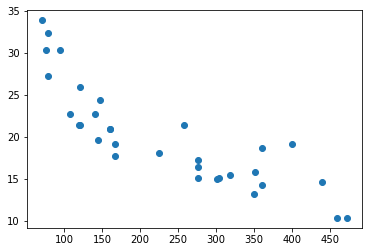

In [32]:
# lets plot disp and mpg
plt.scatter(data.disp,data.mpg)

# cost function / loss function

In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [34]:
print('MSE : Mean Square Error:', mean_squared_error(y_test,y_pred))

MSE : Mean Square Error: 10.598397122056495


In [35]:
print('MSE : Mean absolute Error:', mean_absolute_error(y_test,y_pred))

MSE : Mean absolute Error: 2.7016907097290757


In [37]:
# root mean square error
from math import sqrt
print('RMSE : Root Mean Square Error:',sqrt(mean_squared_error(y_test,y_pred)))

RMSE : Root Mean Square Error: 3.255517949890078


In [38]:
model.score(x_train,y_train)*100

86.85711355516862

In [39]:
model.score(x_test,y_test)*100

44.01151042781414

- model.score gives accuracy for input and output 
- score is used to calculate accuracy between input and output 
- but if we want to find out accuracy for two output then

# To check accuracy for actual vs predicted 

In [40]:
r2_score(y_test,y_pred)*100

44.01151042781414

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred) # this will work only on categorical data not on continuous data

ValueError: continuous is not supported

#  new sample prediction

In [45]:
x_new = np.array([[221,102,2.91]])
y_new = model.predict(x_new)
print(y_new)

[23.21280487]


In [46]:
import matplotlib.pyplot as plt

In [47]:
%matplotlib inline

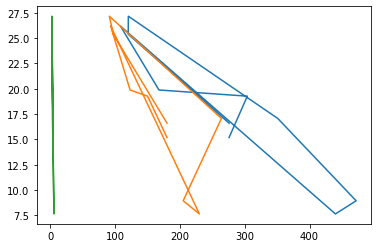

In [48]:
#plt.plot(x_train,y_train,'o')
plt.plot(x_test,y_pred)

In [51]:
# lets check relation betweeen data
f = data[['mpg','disp','hp','wt']]
f[:2]

,mpg,disp,hp,wt
0,21.0,160.0,110,2.620
1,21.0,160.0,110,2.875


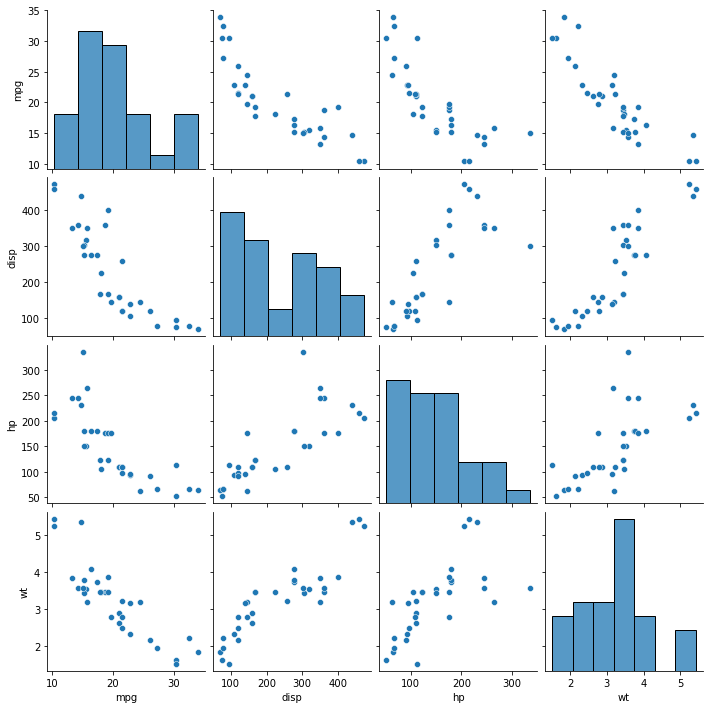

In [52]:
import seaborn as sns
sns.pairplot(f)

<AxesSubplot:>

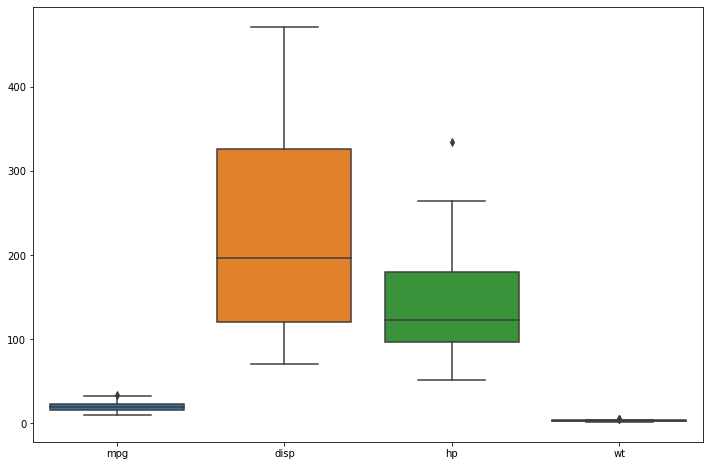

In [56]:
plt.figure(figsize=(12,8))
sns.boxplot(data= f)

In [59]:
# without feature scaling accuracy???
print(model.score(x_train,y_train)*100)
print(model.score(x_test,y_test)*100)

86.85711355516862
44.01151042781414


# Lets start scaling

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
sc = StandardScaler()

In [62]:
X_train = sc.fit_transform(x_train)

In [63]:
X_train[:3]

array([[ 1.57200936,  0.49566536,  0.88526161],
       [ 0.07818336, -0.49695447,  0.44556385],
       [-1.17065518, -1.04998552, -0.99344698]])

In [64]:
x_train[:3]

,disp,hp,wt
24,400.0,175,3.845
5,225.0,105,3.460
17,78.7,66,2.200


In [65]:
model.fit(X_train,y_train)

LinearRegression()

In [66]:
model.score(X_train,y_train)*100

86.85711355516862